# CONTRIBUTORS ANALYSIS

In [1]:
import os
import pandas as pd
from google.colab import drive
from datetime import datetime
import pytz
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### FUNCTIONS

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Wait until Google Drive is mounted
while not os.path.exists('/content/drive/My Drive/'):
    pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Drive folder to save the file
folder_path = '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/'

# Create the folder if it doesn't exist
#os.makedirs(folder_path, exist_ok=True)

In [4]:
# Function to extract company name and count parts from email address
def extract_company(email):
    match = re.search(r'@([^@]+)\.', email)  # Match text after @ and before .
    if match:
        domain = match.group(1)  # Get the domain
        parts = domain.split('.')
        if len(parts) > 2:
            company = parts[-2]
        else:
            company = domain  # If there's only one word after the @ symbol, consider it as the company
        return company.capitalize()  # Capitalize the first letter of the company name and return the count of parts
    return None

In [5]:
def find_debian_subdomain(df):
    # Define a regular expression pattern to match text after @ that contains 'debian'
    pattern = r'@([^@\s]*debian[^@\s]*)'

    # Extract the text matching the pattern from the 'From' column
    matches = df['From'].str.extract(pattern, expand=False)

    # Filter out NaN values and get unique values
    unique_debian_subdomains = matches.dropna().unique()

    # Loop through each unique debian subdomain
    for subdomain in unique_debian_subdomains:
        # Escape special characters in the subdomain
        subdomain_escaped = re.escape(subdomain)

        # Filter rows where 'From' contains the subdomain
        filtered_rows = df[df['From'].str.contains(subdomain_escaped, case=False, na=False)]

        # Replace 'Company' values with 'Debian' for the filtered rows
        df.loc[filtered_rows.index, 'Company'] = 'Debian'

    #print(unique_debian_subdomains)

    # Display the unique text
    return unique_debian_subdomains

In [6]:
#directory used to save all images of this notebook
directory = folder_path + 'img_contributors_analysis'

In [7]:
def plot_chart(dataset, title):
    # Assuming top_company_contributors is the DataFrame with columns 'Company' and 'Contributions'
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plotting the bar chart
    bars = plt.bar(dataset['Company'], dataset['Contributions'])

    # Adding labels and title
    plt.xlabel('Contributor')
    plt.ylabel('Number of Contributions')
    plt.title(title)

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adding contributions value to each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

    # Check if the directory exists, if not create it
    if not os.path.exists(directory):
        os.makedirs(directory)

    filepath = os.path.join(directory, title + '.png')
    plt.savefig(filepath)
    print(f"Plot saved as '{filepath}'")

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

In [8]:
def save_plot_as_image(plot, filename, directory='.'):
    """
    Save a plot as an image file.

    Args:
        plot: Matplotlib plot object.
        filename (str): Name of the output image file.
        directory (str): Directory path where the image will be saved. Default is the current directory.
    """
    # Check if the directory exists, if not create it
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Define the file path
    filepath = os.path.join(directory, filename)

    # Save the plot as an image file
    plot.savefig(filepath)

    print(f"Plot saved as '{filepath}'")

### INDIVIDUAL CONTRIBUTORS

In [9]:
ic_df = pd.read_csv(folder_path + "oficial_debian_members_data.csv")

In [10]:
ct_df = pd.read_csv(folder_path + "contributions_data_by_team.csv")

In [11]:
ic_df.head(5)

,Person,Account Name,Since
0,Aaron M. Ucko,ucko,2001-05-21
1,Abhijith PA,abhijith,2018-11-20
2,Adam D. Barratt,adsb,2008-10-14
3,Adam Majer,adamm,2003-09-18
4,Adam Powell,hazelsct,2000-11-05


In [12]:
ct_df.head(5)

,Contributor,Team,Contribution,Since,Until
0,sudip,wiki.debian.org,wiki editor\n(extra info),January 2020,November 2023
1,sudip,mentors.debian.net,mentors.d.n package commenter\n(extra info),February 2020,February 2020
2,sudip,mentors.debian.net,mentors.d.n package uploader\n(extra info),May 2020,June 2020
3,sudip,bugs.debian.org,bts correspondents\n(extra info),October 2019,January 2024
4,sudip,lists.debian.org,poster,October 2019,January 2024


In [13]:
# Merge the datasets on the 'Account Name' column in ic_df and the 'Contributor' column in ct_df
ic_by_ct_df = pd.merge(ic_df, ct_df, left_on='Account Name', right_on='Contributor', how='inner')

In [14]:
#Rename
ic_by_ct_df.rename(columns={'Since_x': 'Contributor_Join_Date'}, inplace=True)
ic_by_ct_df.rename(columns={'Since_y': 'Team_Creation_Date'}, inplace=True)
ic_by_ct_df.rename(columns={'Until': 'Team_End_Date'}, inplace=True)
ic_by_ct_df.rename(columns={'Person': 'Contributor_Full_Name'}, inplace=True)
ic_by_ct_df.rename(columns={'Contributor': 'Contributor_ID'}, inplace=True)

#Remove
ic_by_ct_df.drop(columns=['Account Name'], inplace=True)

#Reorder
columns = ['Contributor_ID', 'Contributor_Full_Name', 'Contributor_Join_Date', 'Team', 'Team_Creation_Date', 'Team_End_Date', 'Contribution']

# Reindex the DataFrame with the desired column order
ic_by_ct_df = ic_by_ct_df.reindex(columns=columns)

In [15]:
# Display the merged dataframe
ic_by_ct_df.head(10)

,Contributor_ID,Contributor_Full_Name,Contributor_Join_Date,Team,Team_Creation_Date,Team_End_Date,Contribution
0,ucko,Aaron M. Ucko,2001-05-21,svn.debian.org,April 2006,August 2015,committed to svn.debian.org\n(extra info)
1,ucko,Aaron M. Ucko,2001-05-21,ftp.debian.org,June 2008,August 2015,uploads packages\n(extra info)
2,ucko,Aaron M. Ucko,2001-05-21,vote.debian.org,April 2002,April 2023,voter\n(extra info)
3,ucko,Aaron M. Ucko,2001-05-21,collab-maint,November 2009,November 2009,Committer
4,ucko,Aaron M. Ucko,2001-05-21,lists.debian.org,February 2013,January 2022,poster
5,ucko,Aaron M. Ucko,2001-05-21,ftp.debian.org,September 2010,November 2023,uploads packages\n(extra info)
6,ucko,Aaron M. Ucko,2001-05-21,wiki.debian.org,August 2010,August 2015,wiki editor\n(extra info)
7,ucko,Aaron M. Ucko,2001-05-21,bugs.debian.org,September 2001,August 2015,bug submitter\n(extra info)
8,ucko,Aaron M. Ucko,2001-05-21,salsa.debian.org,February 2006,December 2017,package maintainer\n(extra info)
9,ucko,Aaron M. Ucko,2001-05-21,ftp.debian.org,November 2007,November 2023,maintains packages\n(extra info)


#### Total Contributions by Contributor

In [16]:
# Group by 'Contributor_ID' and 'Contributors_Full_Name', then count the number of contributions for each contributor
contributions_count = ic_by_ct_df.groupby(['Contributor_ID', 'Contributor_Full_Name']).size().reset_index(name='Total Contributions')

# Display the result
contributions_count[['Contributor_ID', 'Contributor_Full_Name', 'Total Contributions']]

,Contributor_ID,Contributor_Full_Name,Total Contributions
0,93sam,Steve McIntyre,30
1,aba,Andreas Barth,14
2,abe,Axel Beckert,27
3,abhijith,Abhijith PA,16
4,abi,Michael Ablassmeier,17
...,...,...,...
905,zinoviev,Anton Zinoviev,15
906,zlatan,Zlatan Todoric,5
907,zordhak,Alban Vidal,9
908,zugschlus,Marc Haber,19


In [17]:
# Sort the contributions_count DataFrame by the "Total Contributions" column in descending order
top_10_contributors = contributions_count.sort_values(by='Total Contributions', ascending=False).head(10)

# Display the top 10 contributors with the highest contributions
top_10_contributors[['Contributor_ID', 'Contributor_Full_Name', 'Total Contributions']]

,Contributor_ID,Contributor_Full_Name,Total Contributions
690,rhonda,Rhonda D'Vine,67
630,pabs,Paul Wise,54
895,xnox,Dimitri Ledkov,50
42,andrewsh,Andrej Shadura,44
11,adrianorg,Adriano Rafael Gomes,43
584,myon,Christoph Berg,43
234,enrico,Enrico Zini,42
794,taffit,David Prévot,42
384,jfs,Javier Fernandez-Sanguino Peña,42
330,hertzog,Raphaël Hertzog,41


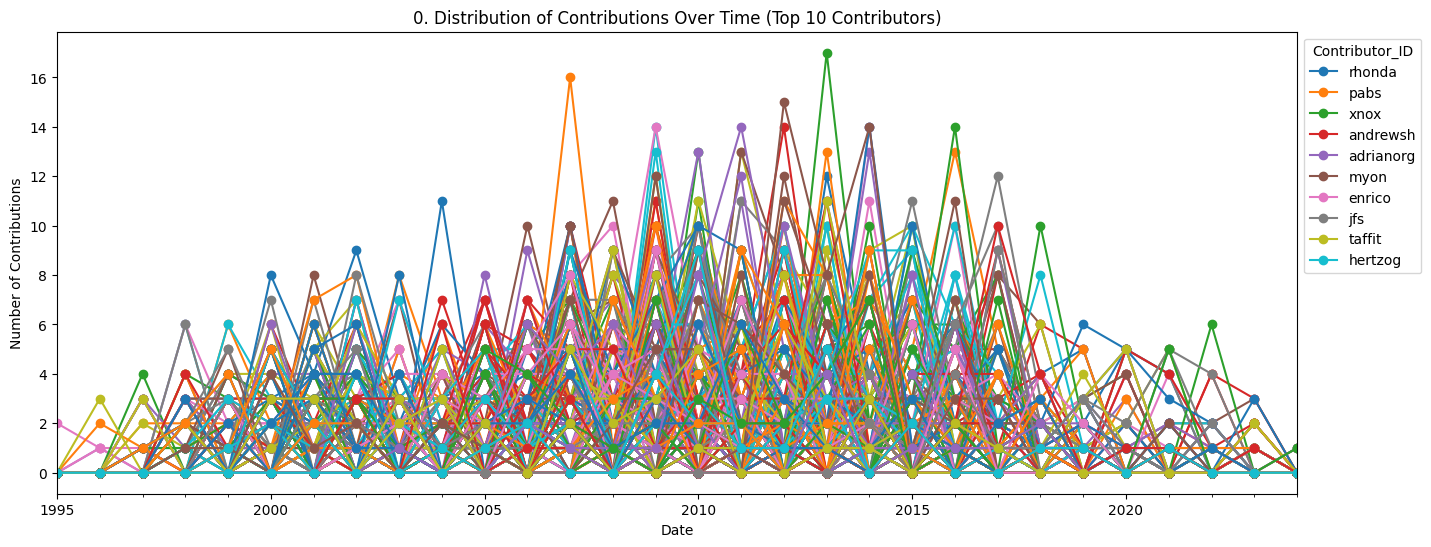

Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/0. Distribution of Contributions Over Time (Top 10 Contributors).png'


In [18]:
# Convert 'Team_Creation_Date' column to datetime
ic_by_ct_df['Team_Creation_Date'] = pd.to_datetime(ic_by_ct_df['Team_Creation_Date'])

# Group by 'Contributor_ID' and 'Team_Creation_Date' and count the number of contributions for each contributor over time
contributions_over_time = ic_by_ct_df.groupby(['Contributor_ID', pd.Grouper(key='Team_Creation_Date', freq='Y')]).size().unstack(fill_value=0)

# Get the top 10 contributors with the highest total contributions
top_10_contributors = contributions_over_time.sum(axis=1).nlargest(10).index
top_10_contributors_dates = contributions_over_time.sum().index

# Filter the contributions_over_time dataframe to include only the top 10 contributors
top_contributions_over_time = contributions_over_time[top_10_contributors_dates]

#top_contributions_over_time_transposed = top_contributions_over_time.transpose()
top_contributions_over_time_transposed = top_contributions_over_time.T

# Plot the distribution of contributions over time for the top 10 contributors
ax = top_contributions_over_time_transposed.plot(kind='line', marker='o', figsize=(16, 6))
# Set y-axis ticks to display integers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

title = '0. Distribution of Contributions Over Time (Top 10 Contributors)'
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Number of Contributions')
plt.grid(False)
ax.legend(labels=top_10_contributors, title="Contributor_ID", bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

# Check if the directory exists, if not create it
if not os.path.exists(directory):
    os.makedirs(directory)

filepath = os.path.join(directory, title + '.png')
ax.figure.savefig(filepath)
print(f"Plot saved as '{filepath}'")

### DPKG

In [19]:
dpkg_df = pd.read_csv(folder_path + "email_content_dpkg_company_contributor.csv")

In [20]:
dpkg_df.head(5)

,Date,From,To,Subject,Content,Link,Company
0,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier
1,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier
2,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier
3,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier
4,2023-12-29 15:49:07+00:00,Niels Thykier <niels@thykier.net>,Dpkg-Maintainers <debian-dpkg@lists.debian.org>,Re: Proper way to do setcap in maintscript,Niels Thykier:,https://lists.debian.org/debian-dpkg/2023/debi...,Thykier


In [21]:
# Count unique values in the 'Company' column
company_counts = dpkg_df['Company'].value_counts()

company_counts

Debian                 53052
Gmail                   6582
Netsplit                3328
Greenend                2960
Web                     1499
                       ...  
Go-taiwan                  1
X2a                        1
Tomstroubleshooting        1
Edpnet                     1
Bc                         1
Name: Company, Length: 764, dtype: int64

In [22]:
find_debian_subdomain(dpkg_df)

array(['ftp-master.debian.org>', 'debian.org>', 'debian.org',
       'release.debian.org>', 'debian.org(Aaron', 'tracker.debian.org',
       'buildd.debian.org>', 'debian.or.jp>', 'debian-ports.org>',
       'debianpt.org>', 'lists.alioth.debian.org', 'qa.debian.org>',
       'packages.qa.debian.org', 'alioth.debian.org',
       'master.debian.org>', 'lists.debian.org>',
       'lists.debian.org(Mailing', 'bugs.debian.org(Debian',
       'debian.org(va,'], dtype=object)

In [23]:
# Filter rows where the 'From' column contains '@Or'
at_web = dpkg_df[dpkg_df['From'].str.contains('@Web', case=False, na=False)]

# Display the filtered dataframe
at_web.head(5)

,Date,From,To,Subject,Content,Link,Company
12743,2015-05-29 12:10:31+00:00,Jörg-Volker Peetz <jvpeetz@web.de>,Antonio Terceiro <terceiro@debian.org>,Re: Bug#786763: redmine: error messages during...,Antonio Terceiro wrote on 05/29/2015 12:49:\n>...,https://lists.debian.org/debian-dpkg/2015/debi...,Web
12744,2015-05-29 12:10:31+00:00,Jörg-Volker Peetz <jvpeetz@web.de>,Antonio Terceiro <terceiro@debian.org>,Re: Bug#786763: redmine: error messages during...,Antonio Terceiro wrote on 05/29/2015 12:49:\n>...,https://lists.debian.org/debian-dpkg/2015/debi...,Web
12745,2015-05-29 12:10:31+00:00,Jörg-Volker Peetz <jvpeetz@web.de>,Antonio Terceiro <terceiro@debian.org>,Re: Bug#786763: redmine: error messages during...,Antonio Terceiro wrote on 05/29/2015 12:49:\n>...,https://lists.debian.org/debian-dpkg/2015/debi...,Web
12746,2015-05-29 12:10:31+00:00,Jörg-Volker Peetz <jvpeetz@web.de>,Antonio Terceiro <terceiro@debian.org>,Re: Bug#786763: redmine: error messages during...,Antonio Terceiro wrote on 05/29/2015 12:49:\n>...,https://lists.debian.org/debian-dpkg/2015/debi...,Web
12747,2015-05-29 12:10:31+00:00,Jörg-Volker Peetz <jvpeetz@web.de>,Antonio Terceiro <terceiro@debian.org>,Re: Bug#786763: redmine: error messages during...,Antonio Terceiro wrote on 05/29/2015 12:49:\n>...,https://lists.debian.org/debian-dpkg/2015/debi...,Web


In [24]:
# Count unique values in the 'Company' column
company_counts = dpkg_df['Company'].value_counts()

In [25]:
company_counts

Debian                 53313
Gmail                   6582
Netsplit                3328
Greenend                2960
Web                     1499
                       ...  
Sf                         1
Waw                        1
Tech                       1
Rogers                     1
Tomstroubleshooting        1
Name: Company, Length: 758, dtype: int64

In [26]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
dpkg_df['Company'] = dpkg_df['Company'].replace(['Gmail', 'Web', 'Outlook', 'Mail'], 'Individual Contributor')

In [27]:
# Update Count unique values in the 'Company' column
company_counts = dpkg_df['Company'].value_counts()

In [28]:
top_company_contributors = company_counts.head(10).reset_index()
top_company_contributors.columns = ['Company', 'Contributions']

In [29]:
top_company_contributors

,Company,Contributions
0,Debian,53313
1,Individual Contributor,8177
2,Netsplit,3328
3,Greenend,2960
4,Grml,1332
5,Ubuntu,1166
6,Uni-tuebingen,943
7,Gmx,913
8,Thykier,840
9,Logic,719


Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/1. Top 10 Company Contributors of DPKG Package.png'


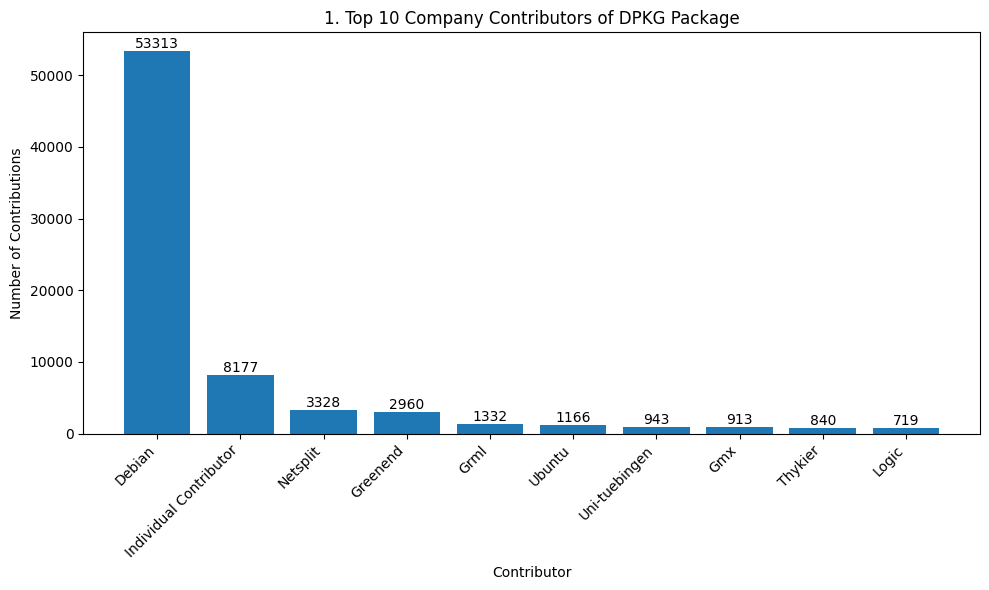

In [30]:
plot_chart(top_company_contributors, '1. Top 10 Company Contributors of DPKG Package')

### GLIBC

In [31]:
glibc_df = pd.read_csv(folder_path + "email_content_glibc_company_contributor.csv")

In [32]:
glibc_df.head(5)

,Date,From,To,Subject,Content,Link,Company
0,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
1,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
2,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
3,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
4,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian


In [33]:
# Count unique values in the 'Company' column
company_counts = glibc_df['Company'].value_counts()

company_counts

Debian        70101
Aurel32        4014
Or             2208
Gmail          1418
Nisa           1193
              ...  
Alinto            1
Openskynet        1
Vapor             1
Msn               1
Posam             1
Name: Company, Length: 564, dtype: int64

In [34]:
# Filter rows where the 'From' column contains '@Or'
at_or = glibc_df[glibc_df['From'].str.contains('.or.', case=False, na=False)]

# Display the filtered dataframe
at_or

,Date,From,To,Subject,Content,Link,Company
0,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
1,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
2,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
3,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
4,2023-12-30 11:36:57+00:00,Debian FTP Masters <ftpmaster@ftp-master.debia...,"Aurelien Jarno <aurel32@debian.org>, GNU Libc ...",glibc_2.38-5_source.changes ACCEPTED into expe...,Thank you for your contribution to Debian.\n\n...,https://lists.debian.org/debian-glibc/2023/deb...,Debian
...,...,...,...,...,...,...,...
99995,2003-08-21 08:52:32+00:00,GOTO Masanori <gotom@debian.or.jp>,"debian-devel@lists.debian.org,debian-glibc@lis...",Re: Bits from the RM,"At Thu, 21 Aug 2003 00:17:27 +1000,\nAnthony T...",https://lists.debian.org/debian-glibc/2003/deb...,Or
99996,2003-08-21 08:52:32+00:00,GOTO Masanori <gotom@debian.or.jp>,"debian-devel@lists.debian.org,debian-glibc@lis...",Re: Bits from the RM,"At Thu, 21 Aug 2003 00:17:27 +1000,\nAnthony T...",https://lists.debian.org/debian-glibc/2003/deb...,Or
99997,2003-08-21 08:52:32+00:00,GOTO Masanori <gotom@debian.or.jp>,"debian-devel@lists.debian.org,debian-glibc@lis...",Re: Bits from the RM,"At Thu, 21 Aug 2003 00:17:27 +1000,\nAnthony T...",https://lists.debian.org/debian-glibc/2003/deb...,Or
99998,2003-08-21 08:52:32+00:00,GOTO Masanori <gotom@debian.or.jp>,"debian-devel@lists.debian.org,debian-glibc@lis...",Re: Bits from the RM,"At Thu, 21 Aug 2003 00:17:27 +1000,\nAnthony T...",https://lists.debian.org/debian-glibc/2003/deb...,Or


In [35]:
# Filter rows where the 'From' column contains '@Or'
exact_or = glibc_df[glibc_df['Company'].str.strip().eq('Or')]

# Display the filtered dataframe
exact_or.head(5)

,Date,From,To,Subject,Content,Link,Company
65542,2004-02-25 04:00:27+00:00,GOTO Masanori <gotom@debian.or.jp>,"Steve Langasek <vorlon@debian.org>,233301@bugs...",Bug#233301: linker reference count error among...,"At Tue, 24 Feb 2004 13:14:08 -0600,\nSteve Lan...",https://lists.debian.org/debian-glibc/2004/deb...,Or
65550,2004-02-24 16:10:35+00:00,GOTO Masanori <gotom@debian.or.jp>,"Cesar Eduardo Barros <cesarb@nitnet.com.br>,23...",Bug#231538: A possible solution,"At Fri, 13 Feb 2004 06:35:47 -0200,\nCesar Edu...",https://lists.debian.org/debian-glibc/2004/deb...,Or
65552,2004-02-24 15:47:07+00:00,GOTO Masanori <gotom@debian.or.jp>,"Hendrik Sattler <post@hendrik-sattler.de>,2342...",Bug#234272: linux-kernel-headers: missing incl...,"At Sun, 22 Feb 2004 23:12:33 +0100,\nHendrik S...",https://lists.debian.org/debian-glibc/2004/deb...,Or
65554,2004-02-24 15:25:52+00:00,GOTO Masanori <gotom@debian.or.jp>,"Joey Hess <joeyh@debian.org>,233392@bugs.debia...",Bug#233392: Inefficient packaging of arch inde...,"At Wed, 18 Feb 2004 20:34:07 -0500,\nJoey Hess...",https://lists.debian.org/debian-glibc/2004/deb...,Or
65555,2004-02-24 15:17:47+00:00,GOTO Masanori <gotom@debian.or.jp>,"edmundo@rano.org,233308@bugs.debian.org",Bug#233308: locales: Esperanto locale should b...,"At Tue, 17 Feb 2004 23:12:42 +0000,\nedmundo@r...",https://lists.debian.org/debian-glibc/2004/deb...,Or


In [36]:
# Replace all occurrences of 'Or' with 'Debian' in the 'Company' column, as all domains that contains that subdomain are from Debian at Japan branch
glibc_df['Company'] = glibc_df['Company'].str.replace('Or', 'Debian')

In [37]:
# Filter rows where the 'From' column contains '@Or'
exact_or = glibc_df[glibc_df['Company'].str.strip().eq('Or')]

# Display the filtered dataframe
exact_or.head(5)

,Date,From,To,Subject,Content,Link,Company


In [38]:
# Count unique values in the 'Company' column
company_counts = glibc_df['Company'].value_counts()

company_counts

Debian         72309
Aurel32         4014
Gmail           1418
Nisa            1193
Co               686
               ...  
Fiestabrava        1
Excess             1
Dell               1
Alinto             1
Earthlink          1
Name: Company, Length: 563, dtype: int64

In [39]:
# Filter rows where the 'From' column contains '@Or'
exact_or = glibc_df[glibc_df['Company'].str.strip().eq('Co')]

# Display the filtered dataframe
exact_or

,Date,From,To,Subject,Content,Link,Company
1865,2023-08-22 16:15:02+00:00,Ian Abbott <abbotti@mev.co.uk>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1050290: glibc: Harmless bug in tcsetattr(...,Source: glibc\nSeverity: minor\n\nDear Maintai...,https://lists.debian.org/debian-glibc/2023/deb...,Co
1866,2023-08-22 16:15:02+00:00,Ian Abbott <abbotti@mev.co.uk>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1050290: glibc: Harmless bug in tcsetattr(...,Source: glibc\nSeverity: minor\n\nDear Maintai...,https://lists.debian.org/debian-glibc/2023/deb...,Co
1867,2023-08-22 16:15:02+00:00,Ian Abbott <abbotti@mev.co.uk>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1050290: glibc: Harmless bug in tcsetattr(...,Source: glibc\nSeverity: minor\n\nDear Maintai...,https://lists.debian.org/debian-glibc/2023/deb...,Co
1868,2023-08-22 16:15:02+00:00,Ian Abbott <abbotti@mev.co.uk>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1050290: glibc: Harmless bug in tcsetattr(...,Source: glibc\nSeverity: minor\n\nDear Maintai...,https://lists.debian.org/debian-glibc/2023/deb...,Co
1869,2023-08-22 16:15:02+00:00,Ian Abbott <abbotti@mev.co.uk>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1050290: glibc: Harmless bug in tcsetattr(...,Source: glibc\nSeverity: minor\n\nDear Maintai...,https://lists.debian.org/debian-glibc/2023/deb...,Co
...,...,...,...,...,...,...,...
99816,2003-08-21 16:29:16+00:00,Philip Blundell <pb@nexus.co.uk>,GOTO Masanori <gotom@debian.or.jp>,Re: Bits from the RM,"On Thu, 2003-08-21 at 09:52, GOTO Masanori wro...",https://lists.debian.org/debian-glibc/2003/deb...,Co
99817,2003-08-21 16:29:16+00:00,Philip Blundell <pb@nexus.co.uk>,GOTO Masanori <gotom@debian.or.jp>,Re: Bits from the RM,"On Thu, 2003-08-21 at 09:52, GOTO Masanori wro...",https://lists.debian.org/debian-glibc/2003/deb...,Co
99818,2003-08-21 16:29:16+00:00,Philip Blundell <pb@nexus.co.uk>,GOTO Masanori <gotom@debian.or.jp>,Re: Bits from the RM,"On Thu, 2003-08-21 at 09:52, GOTO Masanori wro...",https://lists.debian.org/debian-glibc/2003/deb...,Co
99819,2003-08-21 16:29:16+00:00,Philip Blundell <pb@nexus.co.uk>,GOTO Masanori <gotom@debian.or.jp>,Re: Bits from the RM,"On Thu, 2003-08-21 at 09:52, GOTO Masanori wro...",https://lists.debian.org/debian-glibc/2003/deb...,Co


In [40]:
# Apply the function to extract company names and create a new 'Company' column
glibc_df['Company'] = glibc_df['From'].apply(lambda x: extract_company(x))

In [41]:
# Filter rows where the 'From' column contains '@Or'
exact_or = glibc_df[glibc_df['Company'].str.strip().eq('Co')]

# Display the filtered dataframe
exact_or

,Date,From,To,Subject,Content,Link,Company


In [42]:
# Count unique values in the 'Company' column
company_counts = glibc_df['Company'].value_counts()

company_counts

Debian                28502
Bugs.debian           21669
Moszumanska.debian     8814
Ftp-master.debian      8109
Aurel32                4014
                      ...  
Plathome.co               1
Lonesom.pp                1
Cistron                   1
Lycos                     1
Fiestabrava               1
Name: Company, Length: 614, dtype: int64

In [43]:
find_debian_subdomain(glibc_df)

array(['ftp-master.debian.org>', 'debian.org>', 'bugs.debian.org>',
       'salsa.debian.org>', 'lists.debian.org', 'release.debian.org>',
       'moszumanska.debian.org>', 'bugs.debian.org(Debian',
       'debianpt.org>', 'debian.or.jp>', 'auric.debian.org>',
       'debian.org'], dtype=object)

In [44]:
# Count unique values in the 'Company' column
company_counts = glibc_df['Company'].value_counts()

company_counts

Debian          72330
Aurel32          4014
Gmail            1418
Nisa             1193
Gmx               664
                ...  
Greenend.org        1
Msn                 1
Unormal             1
Dell                1
Cistron             1
Name: Company, Length: 604, dtype: int64

In [45]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
glibc_df['Company'] = glibc_df['Company'].replace(['Gmail', 'Outlook', 'Mail'], 'Individual Contributor')

glibc_df['Company'] = glibc_df['Company'].str.replace('Nexus.co', 'Nexus')
glibc_df['Company'] = glibc_df['Company'].str.replace('Adam-barratt.org', 'Adam-barratt')
glibc_df['Company'] = glibc_df['Company'].str.replace('Deneb.enyo', 'Enyo')

<ipython-input-45-409dfc633e66>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  glibc_df['Company'] = glibc_df['Company'].str.replace('Nexus.co', 'Nexus')
<ipython-input-45-409dfc633e66>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  glibc_df['Company'] = glibc_df['Company'].str.replace('Adam-barratt.org', 'Adam-barratt')
<ipython-input-45-409dfc633e66>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  glibc_df['Company'] = glibc_df['Company'].str.replace('Deneb.enyo', 'Enyo')


In [46]:
# Update Count unique values in the 'Company' column
company_counts = glibc_df['Company'].value_counts()

In [47]:
top_company_contributors = company_counts.head(10).reset_index()
top_company_contributors.columns = ['Company', 'Contributions']

In [48]:
top_company_contributors

,Company,Contributions
0,Debian,72330
1,Aurel32,4014
2,Individual Contributor,1470
3,Nisa,1193
4,Gmx,664
5,Enyo,601
6,Nexus,577
7,Physik.fu-berlin,519
8,Adam-barratt,435
9,Redhat,432


Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/2. Top 10 Company Contributors of GLIBC Package.png'


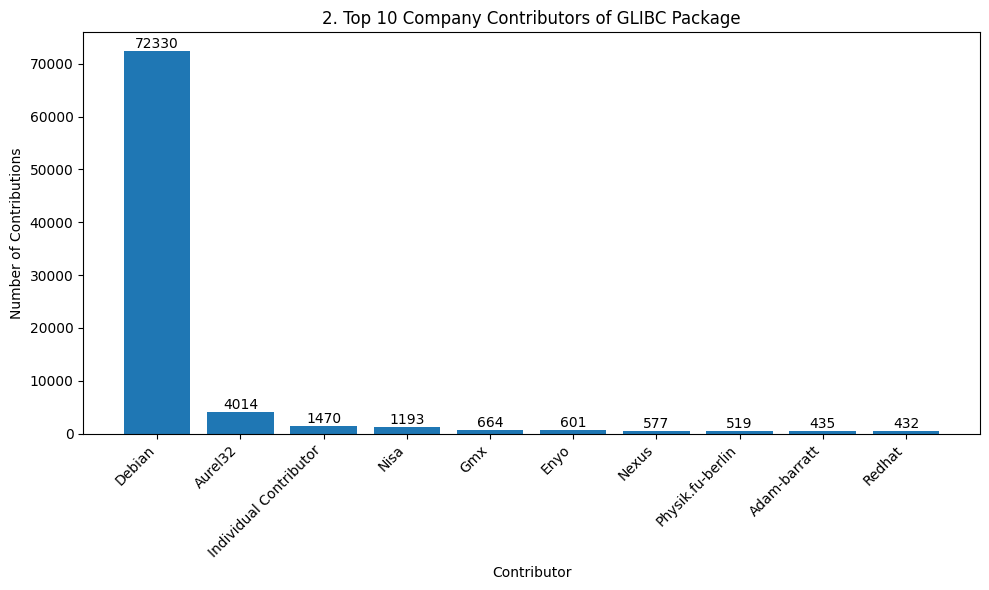

In [49]:
plot_chart(top_company_contributors, '2. Top 10 Company Contributors of GLIBC Package')

### SYSTEMD

In [50]:
systemd_df = pd.read_csv(folder_path + "email_content_systemd_company_contributor.csv")

In [51]:
systemd_df.head(5)

,Date,From,To,Subject,Content,Link,Company
0,2023-12-31 17:57:10+00:00,Debian Bug Tracking System <owner@bugs.debian....,NaN,Processed: archiving 1056135,Processing commands forcontrol at bugs.debian....,https://alioth-lists.debian.net/pipermail/pkg-...,Debian
1,2023-12-31 17:54:04+00:00,Debian Bug Tracking System <owner@bugs.debian....,NaN,Processed: tagging 1058880,Processing commands forcontrol at bugs.debian....,https://alioth-lists.debian.net/pipermail/pkg-...,Debian
2,2023-12-31 17:54:03+00:00,Debian Bug Tracking System <owner@bugs.debian....,NaN,"Processed: unarchiving 1056135, fixed 1056135 ...",Processing commands forcontrol at bugs.debian....,https://alioth-lists.debian.net/pipermail/pkg-...,Debian
3,2023-12-31 17:18:05+00:00,Debian Bug Tracking System <owner@bugs.debian....,NaN,Bug#1053872: marked as done (systemd with high...,"Your message dated Sun, 31 Dec 2023 18:14:47 +...",https://alioth-lists.debian.net/pipermail/pkg-...,Debian
4,2023-12-31 17:06:03+00:00,Debian Bug Tracking System <owner@bugs.debian....,NaN,Bug#1051843: marked as done (systemd: Restart=...,"Your message dated Sun, 31 Dec 2023 18:03:15 +...",https://alioth-lists.debian.net/pipermail/pkg-...,Debian


In [52]:
# Count unique values in the 'Company' column
company_counts = systemd_df['Company'].value_counts()

company_counts

Debian             14376
Gmail               1303
Alioth               143
Gmx                  117
Com                  116
                   ...  
Citigatecredits        1
Hawne                  1
Mergetb                1
Vitry974               1
Codelibre              1
Name: Company, Length: 1485, dtype: int64

In [53]:
# Filter rows where the 'From' column contains '@Or'
exact_com = systemd_df[systemd_df['Company'].str.strip().eq('Com')]

# Display the filtered dataframe
exact_com

,Date,From,To,Subject,Content,Link,Company
150,2023-11-24 04:26:28+00:00,GJ Mutombo <support@vjuh.com.ua>,NaN,Pls get back to me,"Good day,\n\nI am General Mutombo, in charge o...",https://alioth-lists.debian.net/pipermail/pkg-...,Com
1795,2022-09-14 01:40:14+00:00,Serap Akgul <serap.akgul@boyner.com.tr>,NaN,HYN,Can we establish a path to work together for a...,https://alioth-lists.debian.net/pipermail/pkg-...,Com
2336,2022-04-12 07:53:46+00:00,stefanphils.whitemnLab at outlook.com.tr <stef...,NaN,Procurement officer.,"Hi I am stefan philips,\n\nI'm working with Wh...",https://alioth-lists.debian.net/pipermail/pkg-...,Com
2467,2022-02-22 00:20:10+00:00,Garde Heller <ping@csun.com.tw>,NaN,Attn: Sie haben eine Spende!!,"Attn: Sie haben eine Spende in Höhe von $1,500...",https://alioth-lists.debian.net/pipermail/pkg-...,Com
2500,2022-02-09 23:35:08+00:00,IT运维部 <liuhui@lonch.com.cn>,NaN,关于邮件系统备案通知！,各位同事： \n 为提升系统服务能力，邮件系统拟定于2022年2月26日23:...,https://alioth-lists.debian.net/pipermail/pkg-...,Com
...,...,...,...,...,...,...,...
21520,2013-11-27 20:26:23+00:00,gustavo panizzo <gfa> <gfa@zumbi.com.ar>,NaN,[Pkg-systemd-maintainers] Bug#729272: systemd ...,"On 11/27/2013 04:03 PM, Michael Stapelberg wro...",https://alioth-lists.debian.net/pipermail/pkg-...,Com
21628,2013-11-02 21:54:17+00:00,POST PACK COURIER SERVICE <playball@esp2013.co...,NaN,[Pkg-systemd-maintainers] Urgent Notice,An HTML attachment was scrubbed...\nURL: <http...,https://alioth-lists.debian.net/pipermail/pkg-...,Com
21686,2013-10-12 23:44:08+00:00,gustavo panizzo <gfa@zumbi.com.ar>,NaN,[Pkg-systemd-maintainers] Bug#726160: journalc...,Package: systemd\nVersion: 204-5\nSeverity: no...,https://alioth-lists.debian.net/pipermail/pkg-...,Com
21955,2013-08-06 17:52:25+00:00,Angela Bailey <michaels@michaelsrealestate.com...,NaN,[Pkg-systemd-maintainers] (no subject),Atención Señor / Señora:\n\n¿Necesita un prést...,https://alioth-lists.debian.net/pipermail/pkg-...,Com


In [54]:
# Apply the function to extract company names and create a new 'Company' column
systemd_df['Company'] = systemd_df['From'].apply(lambda x: extract_company(x))

In [55]:
# Filter rows where the 'From' column contains '@Or'
exact_com = systemd_df[systemd_df['Company'].str.strip().eq('Com')]

# Display the filtered dataframe
exact_com

,Date,From,To,Subject,Content,Link,Company


In [56]:
# Count unique values in the 'Company' column
company_counts = systemd_df['Company'].value_counts()

company_counts

Debian               6754
Bugs.debian          5745
Ftp-master.debian    1427
Gmail                1303
Release.debian        273
                     ... 
Donation                1
Totally                 1
Bringe                  1
Baetzler                1
Codelibre               1
Name: Company, Length: 1688, dtype: int64

In [57]:
find_debian_subdomain(systemd_df)

array(['bugs.debian.org>', 'debian.org>', 'release.debian.org>',
       'ftp-master.debian.org>', 'lists.debian.org>',
       'lists.alioth.debian.org>', 'lists.alioth.debian.org',
       'debian.com>', 'packages.debian.org', 'tracker.debian.org>',
       'buxtehude.debian.org>'], dtype=object)

In [58]:
# Count unique values in the 'Company' column
company_counts = systemd_df['Company'].value_counts()

company_counts

Debian         14541
Gmail           1303
Gmx              117
Zugschlus        114
Free             113
               ...  
139                1
Zedkep             1
Xianlai-inc        1
Nachtgeist         1
Codelibre          1
Name: Company, Length: 1664, dtype: int64

In [59]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
systemd_df['Company'] = systemd_df['Company'].replace(['Gmail', 'Outlook', 'Yahoo', 'Mail'], 'Individual Contributor')

In [60]:
# Update Count unique values in the 'Company' column
company_counts = systemd_df['Company'].value_counts()

In [61]:
top_company_contributors = company_counts.head(10).reset_index()
top_company_contributors.columns = ['Company', 'Contributions']

In [62]:
top_company_contributors

,Company,Contributions
0,Debian,14541
1,Individual Contributor,1452
2,Gmx,117
3,Zugschlus,114
4,Free,113
5,Jidanni,112
6,Vinc17,85
7,Scientia,82
8,Joshtriplett,78
9,Michaelbiebl,76


Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/3. Top 10 Company Contributors of SYSTEMD Package.png'


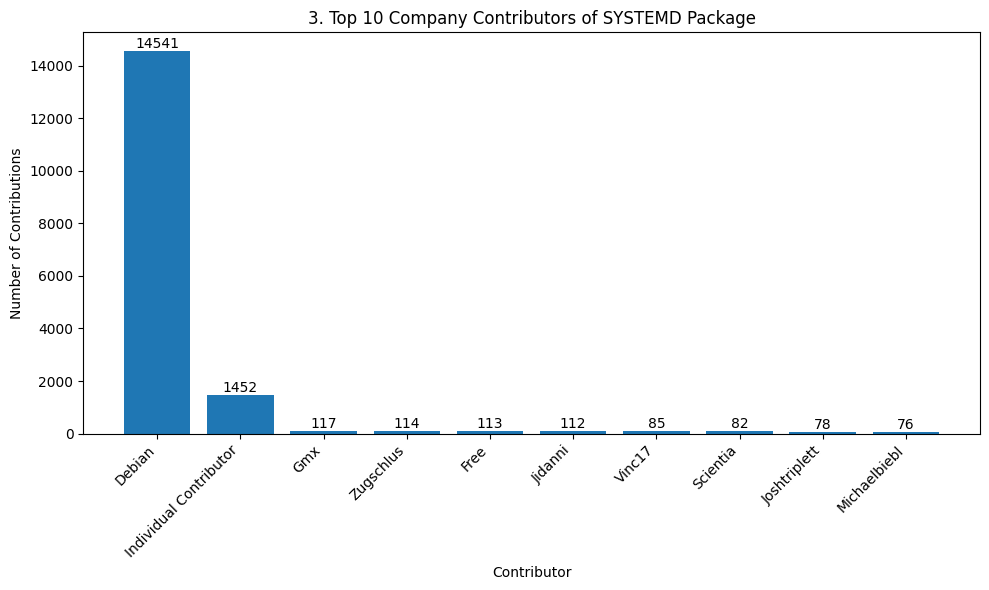

In [63]:
plot_chart(top_company_contributors, '3. Top 10 Company Contributors of SYSTEMD Package')

### APT

In [64]:
apt_df = pd.read_csv(folder_path + "email_content_apt_company_contributor.csv")

In [65]:
apt_df.head(5)

,Date,From,To,Subject,Content,Link,Company
0,2023-12-29 14:18:30+00:00,Patrice Duroux <patrice.duroux@gmail.com>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1059629: apt: doing something like 'apt -t...,Package: apt\nVersion: 2.7.7\nSeverity: wishli...,https://lists.debian.org/deity/2023/deity-2023...,Gmail
1,2023-12-29 14:18:30+00:00,Patrice Duroux <patrice.duroux@gmail.com>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1059629: apt: doing something like 'apt -t...,Package: apt\nVersion: 2.7.7\nSeverity: wishli...,https://lists.debian.org/deity/2023/deity-2023...,Gmail
2,2023-12-29 14:18:30+00:00,Patrice Duroux <patrice.duroux@gmail.com>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1059629: apt: doing something like 'apt -t...,Package: apt\nVersion: 2.7.7\nSeverity: wishli...,https://lists.debian.org/deity/2023/deity-2023...,Gmail
3,2023-12-29 14:18:30+00:00,Patrice Duroux <patrice.duroux@gmail.com>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1059629: apt: doing something like 'apt -t...,Package: apt\nVersion: 2.7.7\nSeverity: wishli...,https://lists.debian.org/deity/2023/deity-2023...,Gmail
4,2023-12-29 14:18:30+00:00,Patrice Duroux <patrice.duroux@gmail.com>,Debian Bug Tracking System <submit@bugs.debian...,Bug#1059629: apt: doing something like 'apt -t...,Package: apt\nVersion: 2.7.7\nSeverity: wishli...,https://lists.debian.org/deity/2023/deity-2023...,Gmail


In [66]:
# Count unique values in the 'Company' column
company_counts = apt_df['Company'].value_counts()

company_counts

Debian          54688
Gmail            6224
Kalnischkies     5799
Mail              825
Vinc17            776
                ...  
Sail                1
Bokomoko            1
Microsoft           1
Kathenas            1
Siduction           1
Name: Company, Length: 673, dtype: int64

In [67]:
find_debian_subdomain(apt_df)

array(['bugs.debian.org>', 'debian.org>', 'ftp-master.debian.org>',
       'release.debian.org>', 'debian.org(Aaron', 'debian-by.org>',
       'debianpt.org>', 'bendel.debian.org>', 'bugs.debian.org(Debian',
       'packages.debian.org>', 'debian.org'], dtype=object)

In [68]:
# Count unique values in the 'Company' column
company_counts = apt_df['Company'].value_counts()

company_counts

Debian          54774
Gmail            6224
Kalnischkies     5799
Mail              825
Vinc17            776
                ...  
Dcemail             1
Rs                  1
Sail                1
Karall-edv          1
Siduction           1
Name: Company, Length: 669, dtype: int64

In [69]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
apt_df['Company'] = apt_df['Company'].replace(['Gmail', 'Outlook', 'Yahoo', 'Mail'], 'Individual Contributor')

In [70]:
# Update Count unique values in the 'Company' column
company_counts = apt_df['Company'].value_counts()

In [71]:
top_company_contributors = company_counts.head(10).reset_index()
top_company_contributors.columns = ['Company', 'Contributions']

In [72]:
top_company_contributors

,Company,Contributions
0,Debian,54774
1,Individual Contributor,7632
2,Kalnischkies,5799
3,Vinc17,776
4,Thykier,754
5,Gmx,548
6,Jidanni,535
7,Zugschlus,500
8,Yucom,462
9,Scientia,444


Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/4. Top 10 Company Contributors of APT Package.png'


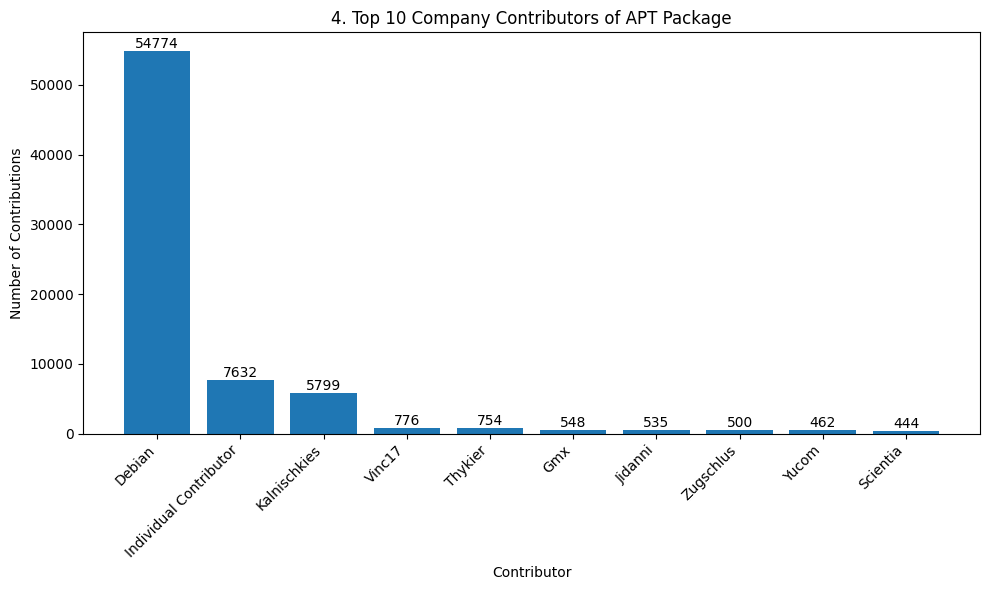

In [73]:
plot_chart(top_company_contributors, '4. Top 10 Company Contributors of APT Package')

### GCC

In [74]:
gcc_df = pd.read_csv(folder_path + "email_content_gcc_company_contributor.csv")

In [75]:
gcc_df.head(5)

,Date,From,To,Subject,Content,Link,Company
0,2023-12-31 09:36:04+00:00,"""Debian Bug Tracking System"" <owner@bugs.debia...",Matthias Klose <doko@debian.org>,Processed: Re: gcc-13: Please build gcc with -...,Processing control commands:\n\n> tags -1 + mo...,https://lists.debian.org/debian-gcc/2023/debia...,Debian
1,2023-12-31 09:36:04+00:00,"""Debian Bug Tracking System"" <owner@bugs.debia...",Matthias Klose <doko@debian.org>,Processed: Re: gcc-13: Please build gcc with -...,Processing control commands:\n\n> tags -1 + mo...,https://lists.debian.org/debian-gcc/2023/debia...,Debian
2,2023-12-31 09:36:04+00:00,"""Debian Bug Tracking System"" <owner@bugs.debia...",Matthias Klose <doko@debian.org>,Processed: Re: gcc-13: Please build gcc with -...,Processing control commands:\n\n> tags -1 + mo...,https://lists.debian.org/debian-gcc/2023/debia...,Debian
3,2023-12-31 09:36:04+00:00,"""Debian Bug Tracking System"" <owner@bugs.debia...",Matthias Klose <doko@debian.org>,Processed: Re: gcc-13: Please build gcc with -...,Processing control commands:\n\n> tags -1 + mo...,https://lists.debian.org/debian-gcc/2023/debia...,Debian
4,2023-12-31 09:36:04+00:00,"""Debian Bug Tracking System"" <owner@bugs.debia...",Matthias Klose <doko@debian.org>,Processed: Re: gcc-13: Please build gcc with -...,Processing control commands:\n\n> tags -1 + mo...,https://lists.debian.org/debian-gcc/2023/debia...,Debian


In [76]:
# Count unique values in the 'Company' column
company_counts = gcc_df['Company'].value_counts()

company_counts

Debian       85208
Gmail         2194
Gnu           1648
Subdivi        855
Fu-berlin      515
             ...  
Librem           2
Id               1
Hotmail          1
Appeartv         1
Snowman          1
Name: Company, Length: 208, dtype: int64

In [77]:
find_debian_subdomain(gcc_df)

array(['bugs.debian.org>', 'debian.org>', 'ftp-master.debian.org>',
       'lists.debian.org', 'release.debian.org>', 'debian.org(Aaron',
       'packages.debian.org>', 'lists.debian.org>', 'debian.org'],
      dtype=object)

In [78]:
# Count unique values in the 'Company' column
company_counts = gcc_df['Company'].value_counts()

company_counts

Debian       85258
Gmail         2194
Gnu           1648
Subdivi        855
Fu-berlin      515
             ...  
Librem           2
Id               1
Hotmail          1
Appeartv         1
Snowman          1
Name: Company, Length: 207, dtype: int64

In [79]:
# As emails at the domain gmail.com and we.de are personal, all contributors in this situation will be considered Individual Contributors
gcc_df['Company'] = gcc_df['Company'].replace(['Gmail', 'Outlook', 'Yahoo', 'Mail'], 'Individual Contributor')

In [80]:
# Update Count unique values in the 'Company' column
company_counts = gcc_df['Company'].value_counts()

In [81]:
top_company_contributors = company_counts.head(10).reset_index()
top_company_contributors.columns = ['Company', 'Contributions']

In [82]:
top_company_contributors

,Company,Contributions
0,Debian,85258
1,Individual Contributor,2232
2,Gnu,1648
3,Subdivi,855
4,Fu-berlin,515
5,Vinc17,465
6,Mirbsd,213
7,Gdcproject,211
8,Posteo,210
9,Gmx,181


Plot saved as '/content/drive/My Drive/IMT Atlantique/Semester 2/Project Complex/Coding/data/final/img_contributors_analysis/5. Top 10 Company Contributors of GCC Package.png'


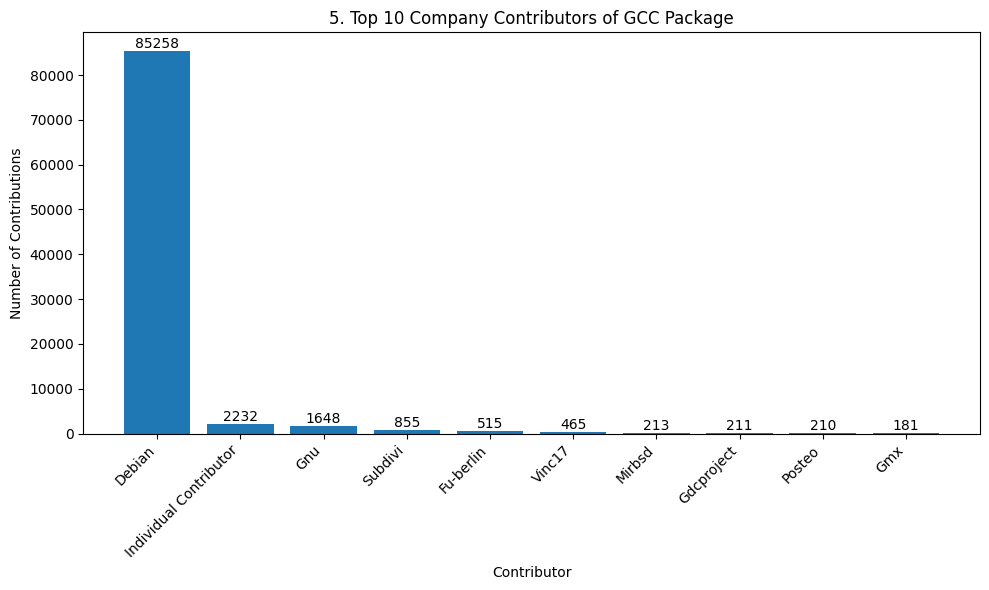

In [83]:
plot_chart(top_company_contributors, '5. Top 10 Company Contributors of GCC Package')